<h1>Boston Dataset-Linear Regression and Sctochastic Gradient Descent</h1>

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
import seaborn as sns
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

<h2>Load Dataset</h2>

In [2]:
boston = load_boston()

In [3]:
type(boston)

sklearn.utils.Bunch

In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
X = boston.data
Y = boston.target

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


<h2>Converting Numpy Array to DataFrame<h2>

In [9]:
boston_data=pd.DataFrame(X,columns=boston.feature_names)

In [10]:
y=pd.DataFrame(Y,columns=['Output'])

In [11]:
print(boston_data.shape)
print(y.shape)

(506, 13)
(506, 1)


In [12]:
boston_data=pd.concat([boston_data,y], axis=1, sort=False)

In [13]:
print(boston_data.shape)

(506, 14)


In [14]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Output
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Mean and Standard Deviation of Output Column

In [15]:
mean_output=boston_data['Output'].mean()

In [16]:
std_output=boston_data['Output'].std()

## Analysis of Distribution of Features via Plots

### CRIM Plots

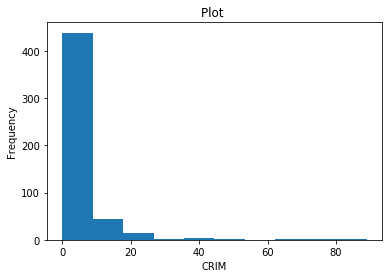

In [17]:
plt.hist(boston_data["CRIM"])
plt.title("Plot ")
plt.xlabel("CRIM")
plt.ylabel("Frequency")
plt.show()

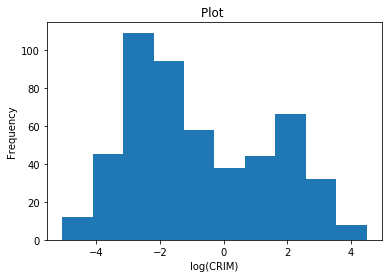

In [18]:
plt.hist((np.log(boston_data["CRIM"])))
plt.title("Plot ")
plt.xlabel("log(CRIM)")
plt.ylabel("Frequency")
plt.show()

CRIM is an log normal distribution. So we apply log on it to get kind of Gaussian Distribution

### ZN Plots

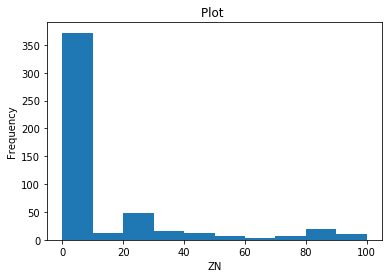

In [19]:
plt.hist(boston_data["ZN"])
plt.title("Plot ")
plt.xlabel("ZN")
plt.ylabel("Frequency")
plt.show()

ZN plot looks like above one but any function is not giving any fruitful result.

### INDUS Plots

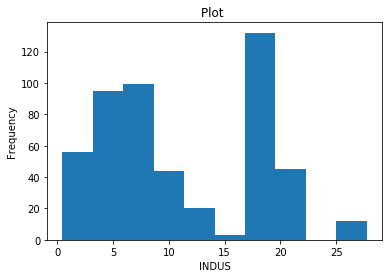

In [20]:
plt.hist(boston_data["INDUS"])
plt.title("Plot ")
plt.xlabel("INDUS")
plt.ylabel("Frequency")
plt.show()

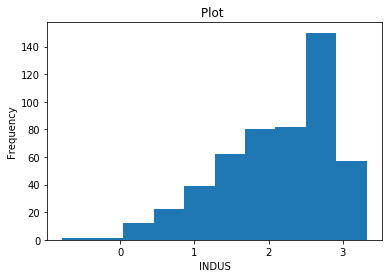

In [21]:
plt.hist((np.log(boston_data["INDUS"])))
plt.title("Plot ")
plt.xlabel("INDUS")
plt.ylabel("Frequency")
plt.show()

INDUS when applied with log gives a right skewed function. So transform is of no use.

### CHAS Plots

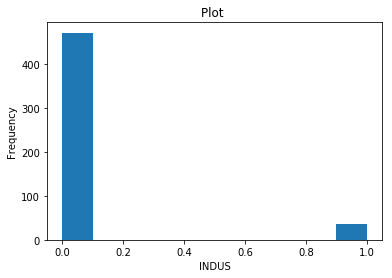

In [22]:
plt.hist(boston_data["CHAS"])
plt.title("Plot ")
plt.xlabel("INDUS")
plt.ylabel("Frequency")
plt.show()

CHAS is a binary categorical feature which has very less 1.0 class features. So this feature may be ignored while creating prediciton model.

### NOX Plots

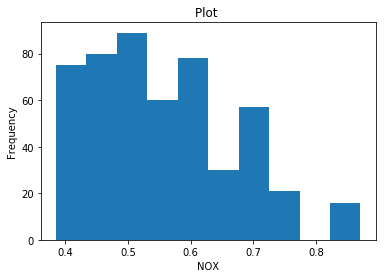

In [23]:
plt.hist(boston_data["NOX"])
plt.title("Plot ")
plt.xlabel("NOX")
plt.ylabel("Frequency")
plt.show()

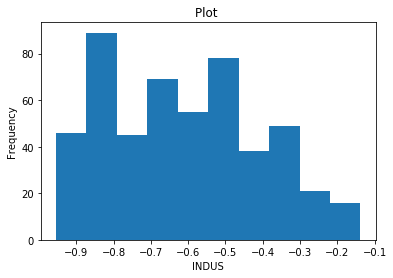

In [24]:
plt.hist((np.log(boston_data["NOX"])))
plt.title("Plot ")
plt.xlabel("INDUS")
plt.ylabel("Frequency")
plt.show()

NOX doesnt give any visually impressive plots when applied with log. So no need to apply log.

### RM Plots

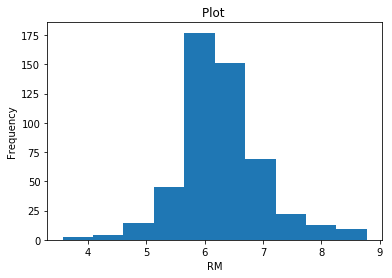

In [25]:
plt.hist(boston_data["RM"])
plt.title("Plot ")
plt.xlabel("RM")
plt.ylabel("Frequency")
plt.show()

RM is already Gaussian Distributed.

### AGE Plots

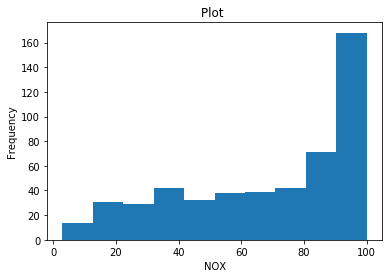

In [26]:
plt.hist(boston_data["AGE"])
plt.title("Plot ")
plt.xlabel("NOX")
plt.ylabel("Frequency")
plt.show()

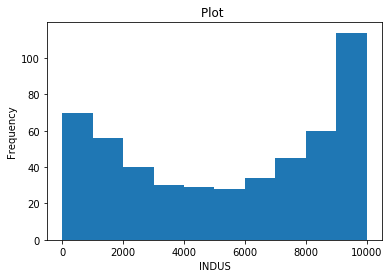

In [27]:
plt.hist((np.square(boston_data["AGE"])))
plt.title("Plot ")
plt.xlabel("INDUS")
plt.ylabel("Frequency")
plt.show()

AGE is also a right skewed distribution. So its of no use to apply log on it. Better use square function on it. 

### DIS Plots

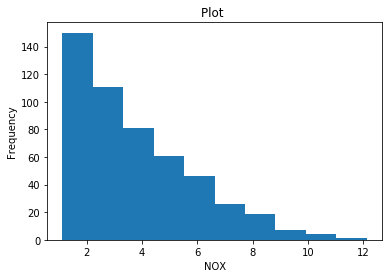

In [28]:
plt.hist(boston_data["DIS"])
plt.title("Plot ")
plt.xlabel("NOX")
plt.ylabel("Frequency")
plt.show()

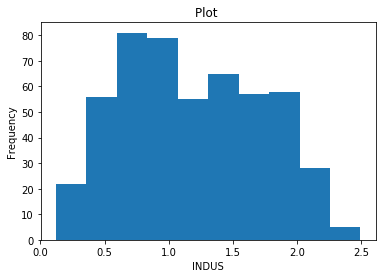

In [29]:
plt.hist((np.log(boston_data["DIS"])))
plt.title("Plot ")
plt.xlabel("INDUS")
plt.ylabel("Frequency")
plt.show()

DIS is also log normal distribution. So we apply log on it to get kind of Gaussian Distribution.

### RAD Plots

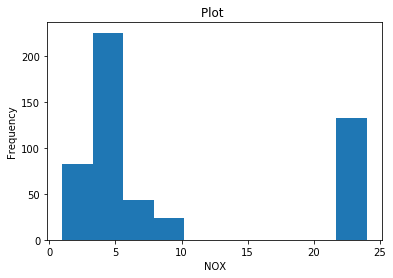

In [30]:
plt.hist(boston_data["RAD"])
plt.title("Plot ")
plt.xlabel("NOX")
plt.ylabel("Frequency")
plt.show()

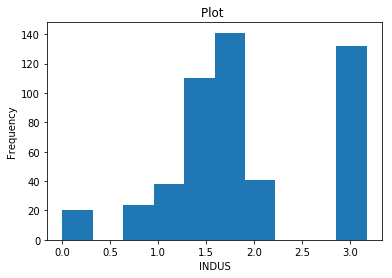

In [31]:
plt.hist((np.log(boston_data["RAD"])))
plt.title("Plot ")
plt.xlabel("INDUS")
plt.ylabel("Frequency")
plt.show()

No use to apply any transform.

### TAX Plots

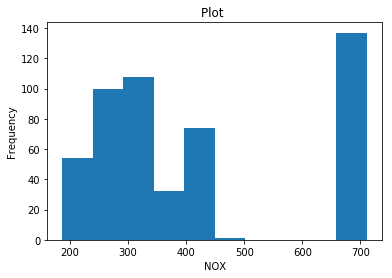

In [32]:
plt.hist(boston_data["TAX"])
plt.title("Plot ")
plt.xlabel("NOX")
plt.ylabel("Frequency")
plt.show()

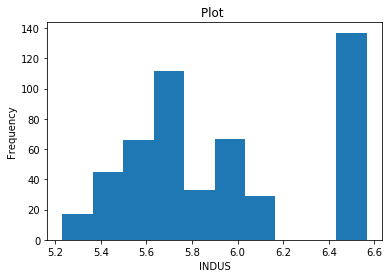

In [33]:
plt.hist((np.log(boston_data["TAX"])))
plt.title("Plot ")
plt.xlabel("INDUS")
plt.ylabel("Frequency")
plt.show()

Here also, No use to apply any transform.

### PTRATIO Plots

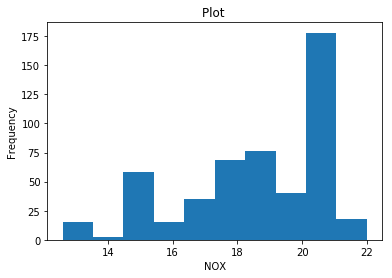

In [34]:
plt.hist(boston_data["PTRATIO"])
plt.title("Plot ")
plt.xlabel("NOX")
plt.ylabel("Frequency")
plt.show()

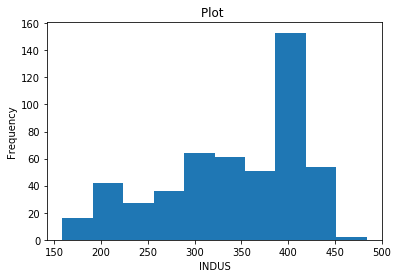

In [35]:
plt.hist((np.square(boston_data["PTRATIO"])))
plt.title("Plot ")
plt.xlabel("INDUS")
plt.ylabel("Frequency")
plt.show()

PTRATIO becomes somewhat more right skewed smoother distribution.

### B Plots

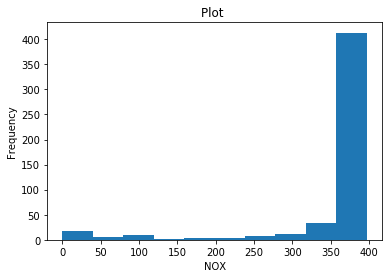

In [36]:
plt.hist(boston_data["B"])
plt.title("Plot ")
plt.xlabel("NOX")
plt.ylabel("Frequency")
plt.show()

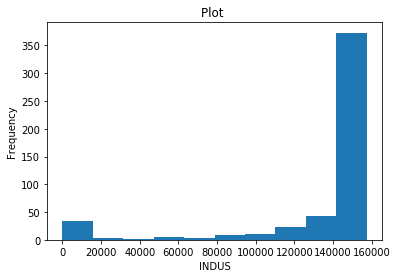

In [37]:
plt.hist((np.square(boston_data["B"])))
plt.title("Plot ")
plt.xlabel("INDUS")
plt.ylabel("Frequency")
plt.show()

No such visible difference of any transform.

### LSTAT Plots

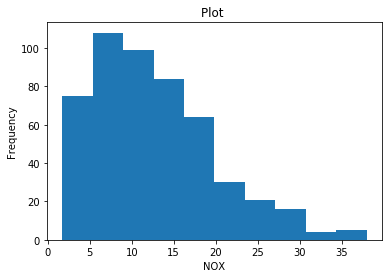

In [38]:
plt.hist(boston_data["LSTAT"])
plt.title("Plot ")
plt.xlabel("NOX")
plt.ylabel("Frequency")
plt.show()

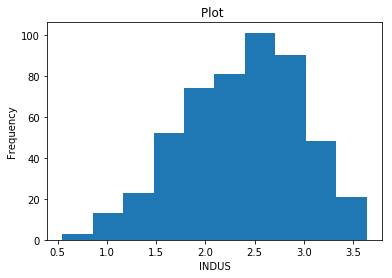

In [39]:
plt.hist((np.log(boston_data["LSTAT"])))
plt.title("Plot ")
plt.xlabel("INDUS")
plt.ylabel("Frequency")
plt.show()

LSTAT becomes somewhat GAussian on applying log.

<h2>Tranforming Features</h2>

In [40]:
boston_data['CRIM']=np.log(boston_data['CRIM'])

In [41]:
boston_data['DIS']=np.log(boston_data['DIS'])

In [42]:
boston_data['AGE']=np.square(boston_data['AGE'])

In [43]:
boston_data['LSTAT']=np.log(boston_data['LSTAT'])

# Feature Standardization

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
Y = (boston_data["Output"])

In [46]:
X_data = boston_data.drop("Output",axis =1)

In [47]:
X_new=MinMaxScaler().fit_transform(X_data)

# Linear Regression

##  Splitting data into Train and Test: Stratified Sampling

In [48]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train,y_test = train_test_split(X_new,Y,test_size = 0.3 ,random_state =100 )
print('Train - Predictors shape', X_train.shape)
print('Test - Predictors shape', X_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

Train - Predictors shape (354, 13)
Test - Predictors shape (152, 13)
Train - Target shape (354,)
Test - Target shape (152,)


## Model Training

In [49]:
#initializing the linear regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept = True ,normalize=False,n_jobs = -1)
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [50]:
lr_coeff=lm.coef_

In [51]:
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x=PrettyTable()
x.field_names=["Weights"]
for i in lr_coeff:
    x.add_row([round(i,2)])
print(x)

+---------+
| Weights |
+---------+
|   2.94  |
|   0.5   |
|   -0.5  |
|   2.5   |
|  -7.48  |
|  14.38  |
|  -0.12  |
|  -12.63 |
|   4.3   |
|   -7.2  |
|  -7.32  |
|   3.93  |
|  -26.56 |
+---------+


In [52]:
# Compute and print MSE and RMSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
R_squared= lm.score(X_test,y_test)
print("Mean squared error : ",mse)
print("Root Mean Squared Error: ",rmse)
print("Coefficient of Determination: ",R_squared)

Mean squared error :  25.50909295227186
Root Mean Squared Error:  5.050652725368461
Coefficient of Determination:  0.7481452815195181


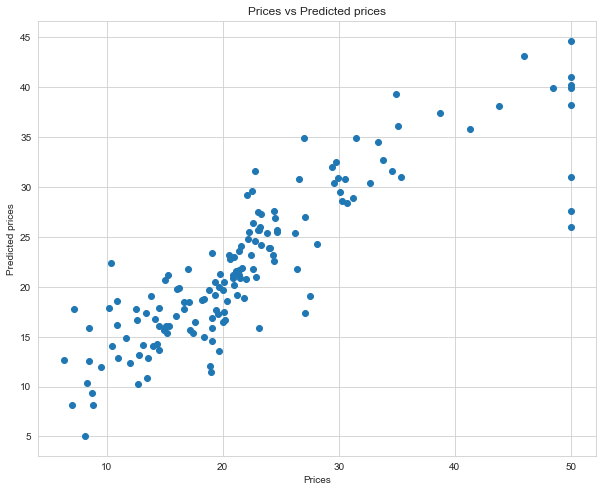

In [53]:
#ploting 
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
plt.scatter(y_test,y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.grid(True)
plt.show()

# Stochastic Gradient Descend : Manual

## Splitting data into Train and Test: Stratified Sampling

In [54]:
std_data1 = MinMaxScaler().fit_transform(boston_data)
X_train ,X_test  = train_test_split(std_data1,test_size = 0.3 ,random_state =10000 )

## Predict Function

In [55]:
# https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/
# Portion of codes taken from the above link.

In [56]:
def pred_price(row, coefficients):
    y_pred = coefficients[0]
    for i in range(len(row)-1):
        y_pred += coefficients[i + 1] * row[i]
    return y_pred

## Calculating Coefficients/Weights via Manual Stochastic Gradient Descend

In [57]:
def coefficients_sgd(train, learning_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
            y_pred = pred_price(row, coef)
            error = y_pred - row[-1]
            coef[0] = coef[0] - learning_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - learning_rate * error * row[i]

    return coef

## Linear Regression via Stochastic Gradient Descend

In [58]:
def linear_regression_sgd(train, test, learning_rate, n_epoch):
    predictions = list()
    coef = coefficients_sgd(train, learning_rate, n_epoch)
    for row in test:
        y_pred = pred_price(row, coef)
        predictions.append(y_pred)
    return(predictions)

## Coeficients/Weights

In [59]:
coef_sgd = coefficients_sgd(X_train,0.001,100) 

In [60]:
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x=PrettyTable()
x.field_names=["Weights"]
for i in coef_sgd:
    x.add_row([round((i*mean_output*2)-std_output/2,2)])
print(x)

+---------+
| Weights |
+---------+
|   6.07  |
|  -2.49  |
|  -1.43  |
|   -5.5  |
|  -0.66  |
|  -5.39  |
|  12.59  |
|  -3.42  |
|   -3.8  |
|  -3.65  |
|  -6.81  |
|  -9.46  |
|   3.69  |
|  -18.43 |
+---------+


###### Weights of SGD Linear Regression differ from normal Linear Regression because while applying SGD we standardize output feature also which is not standardized in case of normal Linear Regression.

## Prediction

In [61]:
y_pred_sgd = linear_regression_sgd(X_train,X_test,0.01,200)

## Calculating Mean Square Error and Root Mean Square Error

In [62]:
y_test =[]
for i in range(len(X_test)):
    price = X_test[i][-1]
    y_test.append(price)

In [63]:
y_test_final = [((i * mean_output*2)+std_output/2) for i in y_test]
y_pred_final = [((i * mean_output*2)+std_output/2) for i in y_pred_sgd]
mse_sgd = mean_squared_error(y_test_final,y_pred_final)
rmse_sgd =mse_sgd**0.5
print("Mean squared error : {}".format(mse_sgd))
print("Root Mean Squared Error: {}".format(mse_sgd**0.5))

Mean squared error : 24.69289863223145
Root Mean Squared Error: 4.969194968224879


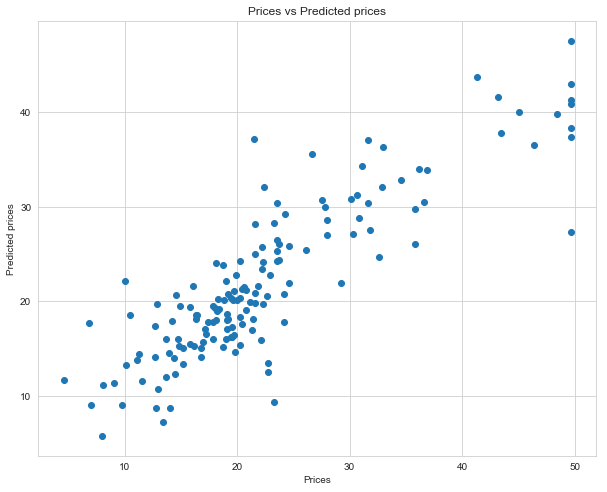

In [64]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
plt.scatter(y_test_final,y_pred_final)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.grid(True)
plt.show()

# Conclusion

In [65]:
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x=PrettyTable()
x.field_names=["Vectorizer","Model","AUC"]
x.add_row(["Linear Regression","MSE",round(mse,2)])
x.add_row(["Linear Regression","RMSE",round(rmse,2)])
x.add_row(["SGD Regression","MSE",round(mse_sgd,2)])
x.add_row(["SGD Regression","RMSE",round(rmse_sgd,2)])
print(x)

+-------------------+-------+-------+
|     Vectorizer    | Model |  AUC  |
+-------------------+-------+-------+
| Linear Regression |  MSE  | 25.51 |
| Linear Regression |  RMSE |  5.05 |
|   SGD Regression  |  MSE  | 24.69 |
|   SGD Regression  |  RMSE |  4.97 |
+-------------------+-------+-------+
